## Transmission Economic Assessment with PyPSA-USA


CEE 272R Spring 2024 Homework 6 \\
Assigned on 5/18/24, due at 11:59pm on Friday, 5/24 \\
Written by Kamran Tehranchi & edited by Sonia and Mateus

This assignment is set up to run in Google Colab, although you may install PyPSA and change file locations to run locally if you wish.

When you submit to Gradescope, please download the export the notebook, including all code outputs, as a pdf.

You should fill in all code blocks labeled "#TODO".

You are given a simplified network of the PyPSA-USA WECC network with the following characteristics:
- 3 buses
- 3 lines
- 167 Generators (MW), listed below by fuel type
```
    CCGT          56915.400
    OCGT          35345.100
    coal          24395.000
    geothermal     3914.200
    hydro         52844.738
    nuclear        7732.600
    oil            1100.300
    onwind        28557.900
    solar         29108.000
```
- Peak Load (MW):
```
    CA    49420.22
    PNW   17931.67
    SW    30590.69
```
- Time-series data for 12 months Jan - Dec 2019

Let's first install PyPSA and import the WECC network so we can visualize it. Run the next few code blocks to generate a plot of the nodes and existing lines.

Install dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pypsa highspy matplotlib cartopy xarray==2023.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.9/180.9 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.1/354.1 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.4

Import the network

In [6]:
import pypsa
import matplotlib.pyplot as plt
## Download the file 'wecc_homework6.nc' and upload it to the 'files' folder in Google Colab
network = pypsa.Network('/content/drive/MyDrive/wecc_homework6.nc')


Plot a network visualization

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip



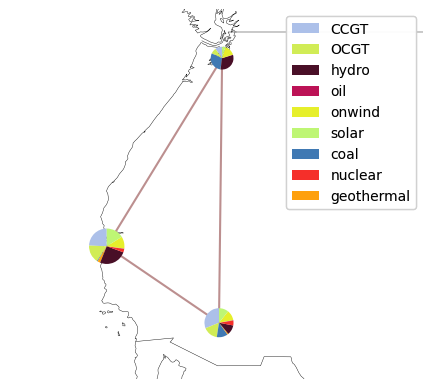

In [7]:
from pypsa.plot import add_legend_patches
import cartopy.crs as ccrs
import random

carriers = network.generators.carrier.unique()
colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in carriers]
network.madd("Carrier", carriers, color=colors)

fig = plt.figure()
ax = plt.axes(projection=ccrs.EqualEarth())
capacities = network.generators.groupby(["bus", "carrier"]).p_nom.sum()

network.plot(
    ax=ax,
    bus_sizes=capacities / 2e5,
    margin=0.2
)

add_legend_patches(ax, colors, carriers)

As you can see, this network is somewhat similar to problem 3 of homework 5 with the California network, but here we actually have realistic generator and load data from 2019.

In this homework, we are going to go through the steps of assessing whether is makes economic sense to build an additional 230kV transmission line between California and the Southwest.

To do this, we are going to compare load costs and adjusted production costs for the different regions in the model. This will help tell a story of who, if any stakeholders, profit from a new transmission line and who, if any, lose money from it.

The goal of this assignment is to practice some Python coding, learn how to run a PyPSA network model and use some PyPSA functions, and analyze the results in the context of what we've learned about transmission grids.


**Problem 1** (3 points)

Simulate a sequential DCOPF of the current given network (i.e. simulate the network operation).

Relevant documentation: https://pypsa.readthedocs.io/en/latest/components.html#network

a)

In [8]:
#TODO
nt=network.optimize(solver_name='highs')


Writing continuous variables.: 100%|██████████| 2/2 [00:04<00:00,  2.37s/it]


Create a labeled time-series plot of the Locational Marginal Prices (LMPs) for the first week of January, 2019.

Relevant documentation: https://pypsa.readthedocs.io/en/latest/components.html#bus

b)

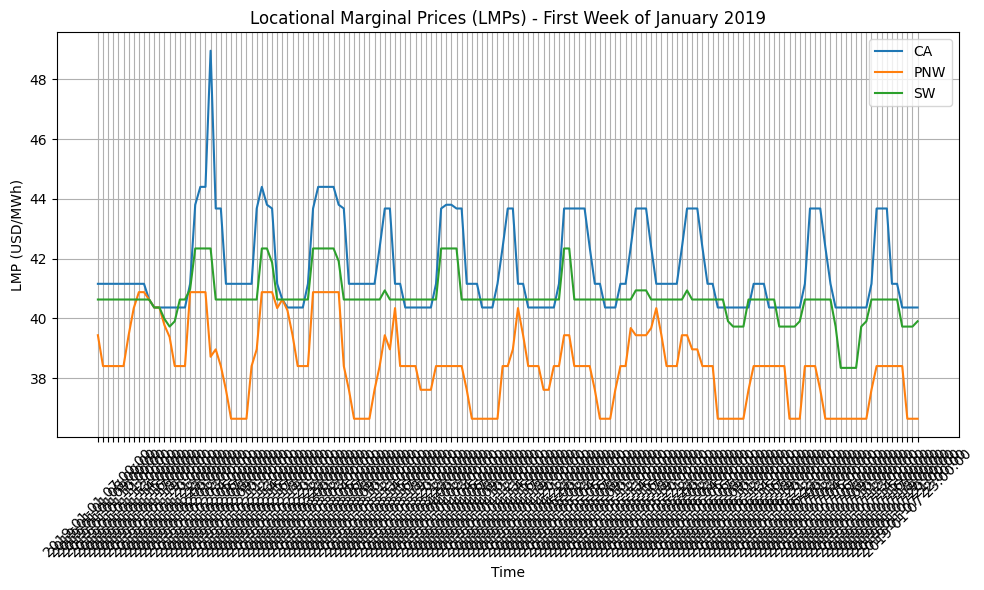

Generator            AVA0 0 CCGT  AVA0 0 OCGT  AVA0 0 hydro  AVA0 0 oil  \
snapshot                                                                  
2019-01-01 07:00:00         -0.0         -0.0    910.288039        -0.0   
2019-01-01 08:00:00         -0.0         -0.0   1020.172739        -0.0   
2019-01-01 09:00:00         -0.0         -0.0   1136.261881        -0.0   
2019-01-01 10:00:00         -0.0         -0.0   1158.997596        -0.0   
2019-01-01 11:00:00         -0.0         -0.0   1144.480904        -0.0   
...                          ...          ...           ...         ...   
2019-12-30 19:00:00         -0.0         -0.0    981.301079        -0.0   
2019-12-30 20:00:00         -0.0         -0.0   1017.980968        -0.0   
2019-12-30 21:00:00         -0.0         -0.0   1105.667878        -0.0   
2019-12-30 22:00:00         -0.0         -0.0   1207.314605        -0.0   
2019-12-30 23:00:00         -0.0         -0.0   1228.581739        -0.0   

Generator            AVA

In [14]:
#TODO


start_date = "2019-01-01 00:00:00"
end_date = "2019-01-07 23:59:59"

lmps = network.buses_t.marginal_price[start_date:end_date]

plt.figure(figsize=(10, 6))
for bus in lmps.columns:
    plt.plot(lmps.index, lmps[bus], label=bus)

plt.title("Locational Marginal Prices (LMPs) - First Week of January 2019")
plt.xlabel("Time")
plt.ylabel("LMP (USD/MWh)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

print(network.generators_t.p)
print(network.lines_t.p0)
generators_t=network.generators_t.p

Run the code block below to get a visualization of the dispatch by fuel type for the first week

Text(0, 0.5, 'GW')

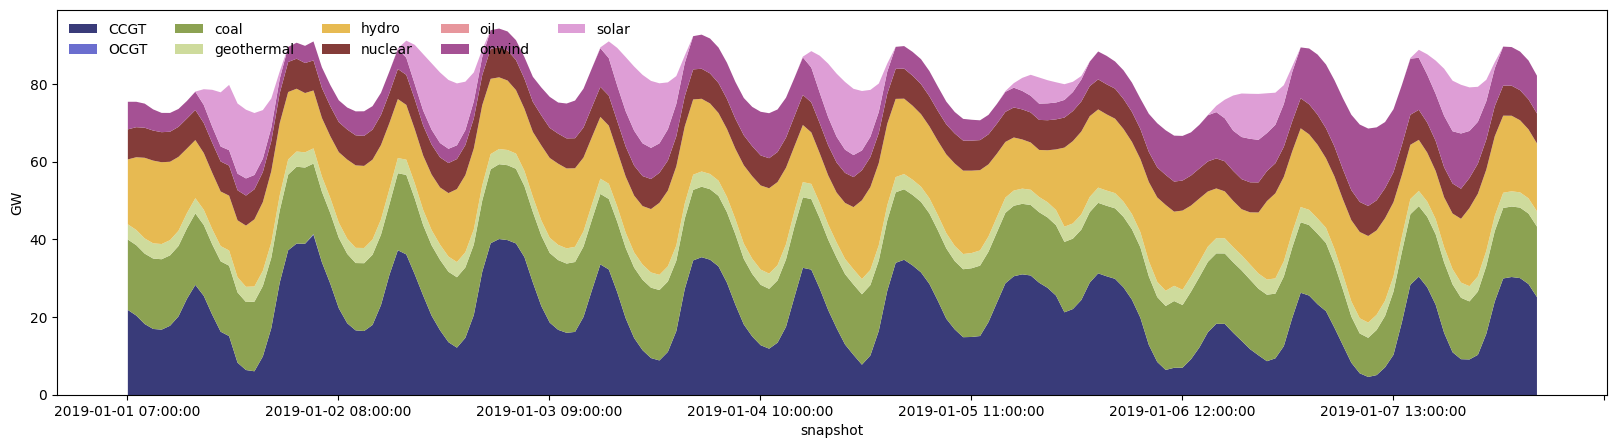

In [10]:
#Dispatch plot of first week
nhours = 24*7
fig, ax = plt.subplots(figsize=(20, 5))
p_by_carrier = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().div(1e3).iloc[:nhours]
p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    cmap="tab20b",
)
ax.legend(ncol=5, loc="upper left", frameon=False)
ax.set_ylabel("GW")

**Problem 2** (4 points)
Next we will calculate Load Costs and Adjusted Production Cost (APC) for California and then the rest of WECC prior to expanding the line. Report all costs in Millions of Dollars.


You will write the code to calculate load costs yourself, but we provide the APC model. If you're curious, the model is below:
\begin{align*}
\text{Regional Adjusted Production Cost (APC)} &= \text{Production Cost} + \text{Purchases} - \text{Sales} &\\
\text{Production Cost} &= \sum_t^T \sum_g^G ( \text{P}_{g,t} \times \text{O}_{g,t} ) &\\
\text{Purchases} &= \sum_t^T (\text{Imports}_t \times \text{Load Weighted LMP}_t) &\\
\text{Sales} &= \sum_t^T (\text{Exports}_t \times \text{Generation Weighted LMP}_t) &\\
\text{Load Weighted LMP}_t &= \frac{\sum_{n} \text{Load Costs}_{n,t} }{\sum_{n} \text{Load}_{n,t}}  \quad \forall \quad n \in region &\\
\text{Generation Weighted LMP}_t &= \frac{\sum_{n} \text{Generation Revenue}_{n,t} }{\sum_{n} \text{Generation}_{n,t} } \quad \forall \quad n \in region &\\
\quad &\\
\text{where} \quad
\text{P: Active power generation of Generator g} &\\
\text{O: Operational/Marginal Cost of Generator g} &
\end{align*}


First, calculate the load costs for California only, reporting one value in millions of $. You'll first write a line of code to find all load costs, then report for CA only.

a)

In [26]:
# TODO: calculate load costs for CA (fill in both variables below)
load_costs = network.loads_t.p.multiply(network.buses_t.marginal_price, axis=1).sum()
load_costs_ca = load_costs[network.buses.index.str.startswith("CA")].sum()

print('Load Costs CA [millions of $]: ', load_costs_ca / 1e6)

Load Costs CA [millions of $]:  14837.182867817772


Run the code below to calculate APC for California:

In [18]:
# Calculate APC for California, report one #:
exports = network.lines_t.p0.where(network.lines_t.p0 > 0, 0) #
imports = network.lines_t.p0.where(network.lines_t.p0 < 0, 0) * -1
generator_production_by_node = network.generators_t.p.groupby(network.generators.bus, axis=1).sum()
# Production Cost
production_costs = network.generators_t.p * network.generators.marginal_cost
production_costs_ca = production_costs.groupby(network.generators.bus, axis=1).sum()['CA']

# Purchases
load_weighted_lmp_ca = load_costs['CA'] / network.loads_t.p_set['CA']
generator_revenue_ca = generator_production_by_node['CA'] * network.buses_t.marginal_price['CA']
gen_weighted_lmp_ca = generator_revenue_ca / generator_production_by_node['CA']

purchases_ca = imports['CA-PNW'] * load_weighted_lmp_ca + imports['CA-SW'] * load_weighted_lmp_ca
sales_ca = exports['CA-PNW'] * gen_weighted_lmp_ca + exports['CA-SW'] * gen_weighted_lmp_ca

APC_ca = production_costs_ca + purchases_ca - sales_ca

print("Adjusted Production Cost: ", APC_ca.sum() / 1e6)
print("Production Cost: ", production_costs_ca.sum() / 1e6)
print("Sales: ", sales_ca.sum() / 1e6)
print("Purchases: ",purchases_ca.sum() / 1e6)


Adjusted Production Cost:  11369565.791833047
Production Cost:  5786.558467762452
Sales:  7.679674487660592
Purchases:  11363786.913039772


Next, calculate load costs for WECC *not including California* prior to expanding the line.

b)


In [27]:
# TODO: calculate load Costs for Non-CA, report one number in millions of $:
wecc_lmps = network.buses_t.marginal_price.filter(like="WECC", axis=1)
wecc_load_costs = (network.loads_t.p.filter(like="WECC", axis=1) * wecc_lmps).sum().sum()

load_costs_wecc=abs(wecc_load_costs - load_costs_ca)
print('Load Costs [millions of $]: ', load_costs_wecc / 1e6)


Load Costs [millions of $]:  14837.182867817772


Run the code below to calculate APC for WECC not including California:

In [29]:
#Calculate APC for Non-CA:
# Production Cost
production_costs = network.generators_t.p * network.generators.marginal_cost
production_costs_wecc = production_costs.groupby(network.generators.bus, axis=1).sum()[['PNW','SW']].sum().sum()

# Purchases
load_weighted_lmp_wecc = load_costs[['PNW','SW']].sum() / network.loads_t.p_set[['PNW','SW']].sum(axis=1)
generator_revenue_wecc = generator_production_by_node[['PNW','SW']] * network.buses_t.marginal_price[['PNW','SW']]
generator_revenue_wecc = generator_revenue_wecc.sum(axis=1)
gen_weighted_lmp_wecc = generator_revenue_wecc / generator_production_by_node[['PNW','SW']].sum(axis=1)

purchases_wecc = exports['CA-PNW'] * load_weighted_lmp_wecc + exports['CA-SW'] * load_weighted_lmp_wecc
sales_wecc = imports['CA-PNW'] * gen_weighted_lmp_wecc + imports['CA-SW'] * gen_weighted_lmp_wecc

APC_wecc = production_costs_wecc + purchases_wecc.sum() - sales_wecc.sum()

print("Adjusted Production Cost: ", APC_wecc.sum() / 1e6)
print("Production Cost: ", production_costs_wecc.sum() / 1e6)
print("Sales: ", sales_wecc.sum() / 1e6)
print("Purchases: ",purchases_wecc.sum() / 1e6)

Adjusted Production Cost:  99370.77931940064
Production Cost:  7921.498968962595
Sales:  1209.7221912601317
Purchases:  92659.00254169817


**Problem 3** (3 points) Add the line to the network and re-simulate the network.

a)

In [30]:
line_name = "CA-SW_newline"
bus0 = 'CA'
bus1 = 'SW'
reactance = 0.1 # Ohm
transfer_capacity = 2000 # MW (s_nom)

In [31]:
# TODO: Add the line by filling in the missing parameters here:
network.add(
    "Line",
    line_name,
    bus0=bus0,
    bus1=bus1,
    x=reactance,
    s_nom=transfer_capacity
)

b)

In [32]:
#TODO: simulate network with new line
nt_2=network.optimize(solver_name='highs')

Index(['CA-SW_newline'], dtype='object', name='Line')
Index(['CA-SW_newline'], dtype='object', name='Line')
Writing continuous variables.: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


**Problem 4** (4 points)

Calculate the new load costs and APC for California

a)

In [33]:
#TODO - set load_costs and load_costs_ca_new variables
load_costs = network.loads_t.p.multiply(network.buses_t.marginal_price, axis=1).sum()
load_costs_ca_new = load_costs[network.buses.index.str.startswith("CA")].sum()
print('Load Costs CA [millions of $]: ', load_costs_ca_new / 1e6)


Load Costs CA [millions of $]:  14743.252071414492


In [34]:
# Calculate APC for California, report one #:
# Production Cost
exports = network.lines_t.p0.where(network.lines_t.p0 > 0, 0) #
imports = network.lines_t.p0.where(network.lines_t.p0 < 0, 0) * -1
generator_production_by_node = network.generators_t.p.groupby(network.generators.bus, axis=1).sum()
production_costs = network.generators_t.p * network.generators.marginal_cost
production_costs_ca = production_costs.groupby(network.generators.bus, axis=1).sum()['CA']

# Purchases
load_weighted_lmp_ca = load_costs['CA'] / network.loads_t.p_set['CA']
generator_revenue_ca = generator_production_by_node['CA'] * network.buses_t.marginal_price['CA']
gen_weighted_lmp_ca = generator_revenue_ca / generator_production_by_node['CA']

purchases_ca = imports['CA-PNW'] * load_weighted_lmp_ca + imports['CA-SW'] * load_weighted_lmp_ca + imports['CA-SW_newline'] * load_weighted_lmp_ca
sales_ca = exports['CA-PNW'] * gen_weighted_lmp_ca + exports['CA-SW'] * gen_weighted_lmp_ca + exports['CA-SW_newline'] * gen_weighted_lmp_ca

APC_ca_new = production_costs_ca + purchases_ca - sales_ca

print("Adjusted Production Cost: ", APC_ca_new.sum() / 1e6)
print("Production Cost: ", production_costs_ca.sum() / 1e6)
print("Sales: ", sales_ca.sum() / 1e6)
print("Purchases: ",purchases_ca.sum() / 1e6)

Adjusted Production Cost:  16310157.809205992
Production Cost:  5242.992505269496
Sales:  12.66103010718752
Purchases:  16304927.47773083


Repeat for non-CA WECC load costs and APC

b)

In [38]:
# TODO: calculate load Costs for Non-CA, report one number in millions of $:

wecc_lmps = network.buses_t.marginal_price.filter(like="WECC", axis=1)
wecc_load_costs = (network.loads_t.p.filter(like="WECC", axis=1) * wecc_lmps).sum().sum()

load_costs_wecc_new=abs(wecc_load_costs - load_costs_ca_new)
print('Load Costs [millions of $]: ', load_costs_wecc_new / 1e6)


Load Costs [millions of $]:  14743.252071414492


In [51]:
#Calculate APC for Non-CA:
# Production Cost
production_costs = network.generators_t.p * network.generators.marginal_cost
production_costs_wecc = production_costs.groupby(network.generators.bus, axis=1).sum()[['PNW','SW']].sum().sum()

# Purchases
load_weighted_lmp_wecc = load_costs[['PNW','SW']].sum() / network.loads_t.p_set[['PNW','SW']].sum(axis=1)
generator_revenue_wecc = generator_production_by_node[['PNW','SW']] * network.buses_t.marginal_price[['PNW','SW']]
generator_revenue_wecc = generator_revenue_wecc.sum(axis=1)
gen_weighted_lmp_wecc = generator_revenue_wecc / generator_production_by_node[['PNW','SW']].sum(axis=1)

purchases_wecc = exports['CA-PNW'] * load_weighted_lmp_wecc + exports['CA-SW'] * load_weighted_lmp_wecc + exports['CA-SW_newline'] * load_weighted_lmp_wecc
sales_wecc = imports['CA-PNW'] * gen_weighted_lmp_wecc + imports['CA-SW'] * gen_weighted_lmp_wecc + imports['CA-SW_newline'] * gen_weighted_lmp_wecc

APC_wecc_new = production_costs_wecc + purchases_wecc.sum() - sales_wecc.sum()

print("Adjusted Production Cost: ", APC_wecc_new.sum() / 1e6)
print("Production Cost: ", production_costs_wecc.sum() / 1e6)
print("Sales: ", sales_wecc.sum() / 1e6)
print("Purchases: ",purchases_wecc.sum() / 1e6)

Adjusted Production Cost:  141981.91703962817
Production Cost:  8456.97617417135
Sales:  1743.1367791291595
Purchases:  135268.07764458598


Problem 5 (5 points) Now we'll conduct Cost Benefit Analysis to determine if the transmission line should be built. First, we assume we only care about the benefits within California.

Here are some assumptions:
- Weight 70\% benefits of load and 30\% benefits of APC
- Assume the same savings patterns occur over the lifetime of the transmission line
- Assume the capital cost of the transmission line is incurred overnight and there is no fixed or variable O&M for the line over its lifetime.
- Interest rate 5\%
- Transmission line has assumed lifetime of 50 years & overnight capital cost of 1e9


We will provide the function for annualized cost:

In [49]:
#Calculate Annualized Cost of the line:
def annualized_cost(capital_cost, lifetime, interest_rate):
    return capital_cost * (interest_rate * (1 + interest_rate) ** lifetime) / ((1 + interest_rate) ** lifetime - 1)

To find the cost benefit for CA, first calculate savings between the no new line and new line case for load costs and APC, then apply the weightings provided above to those savings. Call the annualized cost function from above to find "cost_annual" and calculate the overall cost benefit.

Each "savings" variable should be a scalar.

a)

In [55]:
#TODO: Cost Benefit Analysis
savings_ca_load = load_costs_ca-load_costs_ca_new
savings_apc_ca = APC_ca.sum()-APC_ca_new.sum()
economic_benefit_ca = 0.7*savings_ca_load + 0.3*savings_apc_ca
print("Load Savings CA: ", savings_ca_load / 1e6)
print("APC Savings CA: ", savings_apc_ca/ 1e6)
print("Annual Economic Benefit CA: ", economic_benefit_ca / 1e6)

cost_annual = annualized_cost(1e9, 50, 0.05)
cost_benefit_ca = (cost_annual /1e6) + (economic_benefit_ca / 1e6)
print("Cost-Benefit CA: ", cost_benefit_ca)


Load Savings CA:  93.93079640328025
APC Savings CA:  -4940592.017372945
Annual Economic Benefit CA:  -1482111.8536544014
Cost-Benefit CA:  -1482057.0769189156


Comment on what this means for CA. Negative values indicated decreases in costs.

b)

In [ ]:
#TODO
#comment on results
Load Savings CA:  93.93079640328025
APC Savings CA:  -4940592.017372945
Annual Economic Benefit CA:  -1482111.8536544014
Cost-Benefit CA:  -1482057.0769189156

#According with the previous values, it means a saving of $4940592.017 millions. The negative value of the cost-benefit analysis represent an great impact for the savings.

Now we'll analyze whether this answer changes if we include the costs/benefits of all of WECC.

Run the cost benefit analysis for non-WECC buses then find the total cost benefit.

c)

In [56]:
#TODO: Cost Benefit Analysis:
savings_wecc_load = load_costs_wecc-load_costs_wecc_new
savings_apc_wecc = APC_wecc.sum()-APC_wecc_new.sum()
economic_benefit_wecc = 0.7*savings_wecc_load + 0.3*savings_apc_wecc
print("Load Savings WECC: ", savings_wecc_load / 1e6)
print("APC Savings WECC: ", savings_apc_wecc / 1e6)
print("Economic Benefit WECC: ", economic_benefit_wecc / 1e6)
print("Negative Savings values indicate decrease in cost \n")

cost_benefit_total = (cost_annual /1e6) + ((economic_benefit_wecc + economic_benefit_ca) / 1e6)
print("Total System Cost-Benefit: ", cost_benefit_total)
print("Total Cost increases for WECC due to increase in total production cost and load costs.")

Load Savings WECC:  93.93079640328025
APC Savings WECC:  -42611.13772022754
Economic Benefit WECC:  -12717.589758585966
Negative Savings values indicate decrease in cost 

Total System Cost-Benefit:  -1494774.6666775015
Total Cost increases for WECC due to increase in total production cost and load costs.


Comment on these results. What does this say overall about adding a new line?

d)

In [ ]:
#TODO comment on all results
# With a negative value the system has tremendous saving after adding the transmission line.

**Problem 6** (1 point) In the above method we used production cost simulation to estimate the benefits of the transmission expansion.
Now, we are going to let PyPSA-USA determine the optimal capacity of the line via use capacity expansion methods.

 You can assume linear relationship between capital cost of transmission and nominal capacity of the line.

What is the optimal capacity of the line? (There's just one line of code you have to add here.) Notice the s_nom_extendable feature; this allows the nominal complex power of the line to expand.

In [58]:

network = pypsa.Network('/content/drive/MyDrive/wecc_homework6.nc')
network.add(
    "Line",
    line_name,
    bus0=bus0,
    bus1=bus1,
    x=reactance,
    s_nom=0,
    capital_cost= cost_annual / transfer_capacity,
    s_nom_extendable=True,
)

Rerun the network simulation:

In [59]:
#TODO
nt_2=network.optimize(solver_name='highs')

Index(['CA-SW_newline'], dtype='object', name='Line')
Index(['CA-SW_newline'], dtype='object', name='Line')
Writing continuous variables.: 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]


Run the code below to print out all of the line capacities:

In [60]:
network.lines.s_nom_opt

Line
CA-PNW           3000.000000
PNW-SW           1000.000000
CA-SW            2000.000000
CA-SW_newline    1608.493303
Name: s_nom_opt, dtype: float64